In [1]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns
import math

import latenta as la
la.logger.setLevel("INFO")

In [2]:
cells = la.Dim(1000, id = "cell")
clusters = la.Dim(3, id = "cluster")

In [5]:
latent = la.Latent(
    la.distributions.Normal(),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [18]:
latent = la.Latent(
    la.distributions.CircularUniform(),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [7]:
latent = la.Latent(
    la.distributions.LogNormal(),
    initial = 1.,
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [8]:
latent = la.Latent(
    la.distributions.LogitNormal(loc = 4.),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [9]:
latent = la.Latent(
    la.distributions.Dirichlet(definition = la.Definition([clusters])),
    definition = la.Definition([cells, clusters])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [10]:
latent = la.Latent(
    la.distributions.Dirichlet(0.5, definition = la.Definition([clusters])),
    definition = la.Definition([cells, clusters])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [11]:
latent = la.Latent(
    la.distributions.Laplace(),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [12]:
latent = la.Latent(
    la.distributions.Laplace(loc = 4., scale = 10.),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [13]:
latent = la.Latent(
    la.distributions.Beta(),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [14]:
latent = la.Latent(
    la.distributions.Beta(0.1, 0.1),
    definition = la.Definition([cells])
)
p = latent.p
q = latent.q
initial = None
initial_quantiles = None

In [19]:
initial_quantile_mapping = [[0.9, 0.65], [0.1, 0.35]]
samples_p = torch.stack([latent.p.prior() for _ in range(5)])
samples_q = torch.stack([latent.q.prior() for _ in range(5)])

tensor(0.7177)
tensor(3.6747)


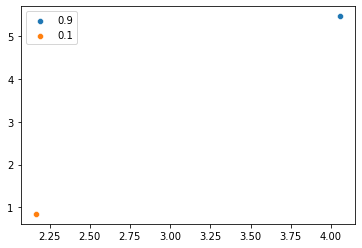

In [20]:
for q1, q2 in initial_quantile_mapping:
    print(samples_p.quantile(q2) / samples_p.quantile(q1))
    ax = sns.scatterplot(x = samples_p.quantile(q2).numpy().flatten(), y = samples_q.quantile(q1).numpy().flatten(), label = q1)

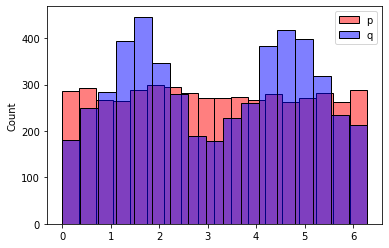

In [21]:
sns.histplot(samples_p.flatten(), color = "red", alpha = 0.5, label = "p")
sns.histplot(samples_q.flatten(), color = "blue", alpha = 0.5, label = "q")
plt.legend()